### Import all mondules that will be used

In [121]:
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
def tab(frame, format):
    return tabulate(frame, headers='keys', tablefmt=format)

In [123]:
# Making the csv file readable
df = pd.read_csv('orderHistory.csv')

In [124]:
#Filling missing calues with 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         687 non-null    object 
 1   Order ID                        687 non-null    object 
 2   Order Date                      687 non-null    object 
 3   Purchase Order Number           687 non-null    object 
 4   Currency                        687 non-null    object 
 5   Unit Price                      687 non-null    float64
 6   Unit Price Tax                  687 non-null    float64
 7   Shipping Charge                 687 non-null    float64
 8   Total Discounts                 687 non-null    object 
 9   Total Owed                      687 non-null    float64
 10  Shipment Item Subtotal          687 non-null    object 
 11  Shipment Item Subtotal Tax      687 non-null    object 
 12  ASIN                            687 

In [125]:
#Filling missing calues with 0
df = df.fillna(0)

In [126]:
# Removing non-numeric characters and converting them to floats
df["Shipment Item Subtotal"] = pd.to_numeric(df["Shipment Item Subtotal"].str.replace('[^\d.]', '', regex=True), errors='coerce')

In [127]:
# getting all the addresses used by using the unique method so there are no repeats
addresses = df["Shipping Address"].unique()
addresses

array(['Imir Ransom 1141 Creekside Dr Wilmington DE 19804 United States',
       'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Ahmad Benefield 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Teyonna Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 19804-3931 United States',
       'Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-4401 United States',
       'Stephanie Pullins 2626 N BANCROFT ST PHILADELPHIA PA 19132-3933 United States',
       'Imir 2005 CERVANTES CT NEWARK DE 19702-4401 United States',
       'Sadie Graham 203 ATLANTIC AVE WILMINGTON DE 19804-1432 United States',
       'Jeffrey Mullen 203 ATLANTIC AVE WILMINGTON DE 19804-1432 United States',
       'Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 United States',
       'Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE 19711-6819 United States',
       'Imir Ransom 2 Indepence Hall Newark De

In [128]:
steph1 = addresses[1]
steph2 = addresses[6] 
steph1

'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States'

In [129]:
steph2

'Stephanie Pullins 2626 N BANCROFT ST PHILADELPHIA PA 19132-3933 United States'

In [130]:
s = df.groupby(['Shipping Address'])['Shipment Item Subtotal'].sum().reset_index()
s

,Shipping Address,Shipment Item Subtotal
0,Ahmad Benefield 3007 N STILLMAN ST PHILADELPHI...,65.64
1,Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 198...,145.48
2,Imir 2005 CERVANTES CT NEWARK DE 19702-4401 Un...,1064.44
3,Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 ...,1268.42
4,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,1456.69
5,Imir Ransom 2 Indepence Hall Newark Delaware 1...,26.80
6,Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-...,214.74
7,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,396.13
8,Jeffrey Mullen 203 ATLANTIC AVE WILMINGTON DE ...,179.00
9,Sadie Graham 203 ATLANTIC AVE WILMINGTON DE 19...,33.99


In [131]:
s = df.groupby(['Shipping Address'])['Total Owed'].sum().reset_index()
s

,Shipping Address,Total Owed
0,Ahmad Benefield 3007 N STILLMAN ST PHILADELPHI...,65.98
1,Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 198...,145.48
2,Imir 2005 CERVANTES CT NEWARK DE 19702-4401 Un...,646.81
3,Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 ...,1142.67
4,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,1366.06
5,Imir Ransom 2 Indepence Hall Newark Delaware 1...,50.57
6,Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-...,221.71
7,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,381.13
8,Jeffrey Mullen 203 ATLANTIC AVE WILMINGTON DE ...,173.63
9,Sadie Graham 203 ATLANTIC AVE WILMINGTON DE 19...,39.98


Need to make a column with the addresses reflecting the names of those associated with them

In [132]:
# Creating a function that will be later used to implement a name based on the address in the DataFrame
def get_name(name):
    if name == 'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States' or name == 'Stephanie Pullins 2626 N BANCROFT ST PHILADELPHIA PA 19132-3933 United States':
        return "Stephanie"
    elif name == 'Ahmad Benefield 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States':
        return "Ahmad"
    elif name == 'Teyonna Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States':
        return "Teyonna"
    elif name == 'Sadie Graham 203 ATLANTIC AVE WILMINGTON DE 19804-1432 United States':
        return "Sadie"
    elif name == 'Jeffrey Mullen 203 ATLANTIC AVE WILMINGTON DE 19804-1432 United States':
        return "Jeffrey"
    elif name == 'Imir Ransom 1141 Creekside Dr Wilmington DE 19804 United States' or name == 'Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 19804-3931 United States' or name == 'Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-4401 United States' or name == 'Imir 2005 CERVANTES CT NEWARK DE 19702-4401 United States' or name == 'Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 United States' or name == 'Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE 19711-6819 United States' or name == 'Imir Ransom 2 Indepence Hall Newark Delaware 19711 United States':
        return "Imir"
    

In [133]:
# Applying this function to the age column using the apply() method and assigning the result to a new coumn called name
df['Name'] = df['Shipping Address'].apply(get_name)
# New info for the new column added
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         687 non-null    object 
 1   Order ID                        687 non-null    object 
 2   Order Date                      687 non-null    object 
 3   Purchase Order Number           687 non-null    object 
 4   Currency                        687 non-null    object 
 5   Unit Price                      687 non-null    float64
 6   Unit Price Tax                  687 non-null    float64
 7   Shipping Charge                 687 non-null    float64
 8   Total Discounts                 687 non-null    object 
 9   Total Owed                      687 non-null    float64
 10  Shipment Item Subtotal          674 non-null    float64
 11  Shipment Item Subtotal Tax      687 non-null    object 
 12  ASIN                            687 

In [134]:
# Getting the unique names from the DataFrame
df['Name'].unique()

array(['Imir', 'Stephanie', 'Ahmad', 'Teyonna', 'Sadie', 'Jeffrey'],
      dtype=object)

## Who spent the most money?
### DataFrame
After getting the `Name` of those that made purchases on the account using the `Shipping Address` column,
I find the sum of the `Total Owed` (the total amount of purchases they made) and group them together
to see who made the most purchases since the beginning of the account

In [135]:
#df.sort_values('Name')

In [136]:
overall_sum = df.groupby(['Name'])['Total Owed'].sum().reset_index()
overall_sum

,Name,Total Owed
0,Ahmad,65.98
1,Imir,3954.43
2,Jeffrey,173.63
3,Sadie,39.98
4,Stephanie,7935.95
5,Teyonna,23.05


## Who spent the most money
### Plotted
The y axis is the total amount spent. I used my variable `overall_sum` to represent the total amont spent so that it was the same
size as my x axis. I also made the x axis the same size using the method `unique` since the sum of from the `Total Owed` only gives the
unique column names since they were grouped together in using the measurement `sum`. <break>
    
Though, the next issue I had was `df['Name'].unique()` was putting the names in the incorrect order, for the `overall_sum` DataFrame has
the names in alphabetical order. So, I casted the `sorted` function over it so that `Name` column would return in alphabetical order,
matching it up with it's respective data.

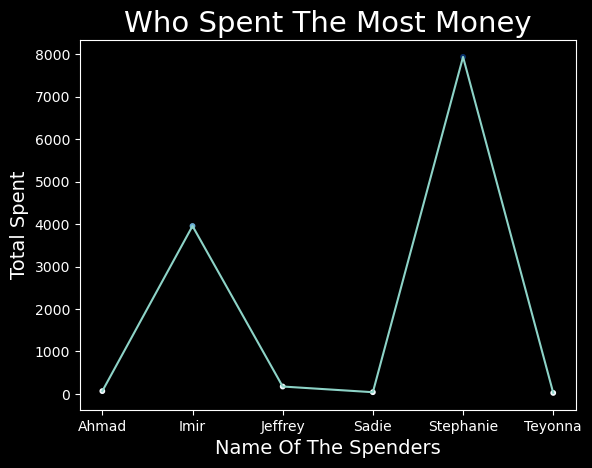

In [137]:
x = sorted(df['Name'].unique())
y = overall_sum['Total Owed']
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap=plt.cm.Blues, s=10)
ax.set_title('who spent the most money'.title(), fontsize=21)
ax.set_xlabel("name of the spenders".title(), fontsize=14)
ax.set_ylabel('total spent'.title(), fontsize=14)


plt.plot(x, y)
plt.show()

In [143]:
items_for_2023 = df[df["Order Date"] >= "2023-01-01"]
items_for_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 455
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         456 non-null    object 
 1   Order ID                        456 non-null    object 
 2   Order Date                      456 non-null    object 
 3   Purchase Order Number           456 non-null    object 
 4   Currency                        456 non-null    object 
 5   Unit Price                      456 non-null    float64
 6   Unit Price Tax                  456 non-null    float64
 7   Shipping Charge                 456 non-null    float64
 8   Total Discounts                 456 non-null    object 
 9   Total Owed                      456 non-null    float64
 10  Shipment Item Subtotal          452 non-null    float64
 11  Shipment Item Subtotal Tax      456 non-null    object 
 12  ASIN                            456 non-n